# Regression - Supervised Machine Learning

## Contents List:

#### 1. Import libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Test another hypothesis

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import merged_with_income_code.csv

path = r'C:\Users\susan\OneDrive\Desktop\Data Analytics Program\Causes_of_Death_Worldwide_Analysis_Susan_Lee'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_with_income_code.csv'), index_col = False)

In [4]:
# Set the max columns and rows to none

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,South Asia,Low income,both,1
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,South Asia,Low income,both,1
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,South Asia,Low income,both,1
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,South Asia,Low income,both,1
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,South Asia,Low income,both,1


In [6]:
df.shape

(6030, 38)

## 2. Data Cleaning

In [7]:
# Check for missing values

df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

#### There are no missing values.

In [8]:
# Check for duplicates

dups = df.duplicated()

In [9]:
dups.shape

(6030,)

#### There are no duplicate values.

<AxesSubplot:xlabel='Cardiovascular Diseases', ylabel='Count'>

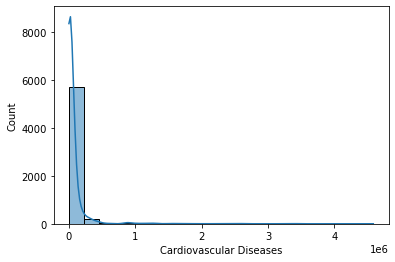

In [10]:
# Check for extreme values

sns.histplot(df['Cardiovascular Diseases'], bins=20, kde = True)

In [12]:
# Check the mean

df['Cardiovascular Diseases'].mean()

74252.1039800995

In [13]:
# Check the median

df['Cardiovascular Diseases'].median()

12229.5

In [14]:
# Check the max

df['Cardiovascular Diseases'].max()

4584273

In [22]:
df[df['Cardiovascular Diseases'] >3000000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
1110,China,CHN,2007,8407,187358,52766,10611,21,76277,23339,5014,14992,10723,66462,3413237,190310,99540,21274,159417,1180,11643,4625,2126460,88,123442,142069,27780,7878,324159,1161612,170433,297567,11500,5017,East Asia & Pacific,Upper middle income,both,3
1111,China,CHN,2008,8384,197380,54828,10623,15,73624,21775,4534,16310,10288,61286,3523450,187559,93539,21408,154710,88421,10058,4676,2168067,114,125045,146413,28939,7906,327299,1149016,167955,292928,11363,4757,East Asia & Pacific,Upper middle income,both,3
1112,China,CHN,2009,8394,208139,57485,10874,9,72888,20659,4207,16364,9981,56959,3669964,186990,87453,21192,150572,611,8901,4447,2214787,392,128147,152838,30105,8098,329237,1145608,164921,288756,11346,4509,East Asia & Pacific,Upper middle income,both,3
1113,China,CHN,2010,8341,218436,60241,11293,12,70955,18926,3762,16722,9838,53312,3831636,186499,79733,21077,146044,7175,7891,4454,2265802,19,132114,160396,30838,8425,327545,1139700,162119,285663,11362,4334,East Asia & Pacific,Upper middle income,both,3
1114,China,CHN,2011,8193,225852,61781,11739,11,66696,17477,3350,17075,9567,50513,3937801,184317,75901,20738,139061,844,7198,4400,2296328,67,134980,165833,30883,8809,315824,1115828,158710,281834,11152,4212,East Asia & Pacific,Upper middle income,both,3
1115,China,CHN,2012,8057,232656,62640,12120,0,65110,16177,3015,16455,9170,48260,3973790,181048,74505,20458,131641,871,6779,4441,2318471,55,137073,169494,30494,9145,300970,1083590,155219,277791,10934,4158,East Asia & Pacific,Upper middle income,both,3
1116,China,CHN,2013,7971,239240,63853,12748,0,63152,15134,2761,17728,8989,46072,4049045,178100,68958,20181,126196,1402,6452,4616,2337453,213,140303,173650,30263,9690,288937,1058374,151718,273718,10851,4160,East Asia & Pacific,Upper middle income,both,3
1117,China,CHN,2014,7740,249056,65555,13528,0,62733,14194,2340,21784,8980,43438,4120839,175785,63241,20069,123006,1684,6131,4582,2378155,425,145136,177089,29957,10365,279949,1042132,149653,271449,10766,4143,East Asia & Pacific,Upper middle income,both,3
1118,China,CHN,2015,7553,259217,66761,14487,0,61489,13512,2341,26060,8872,41987,4180060,175523,66013,19893,120453,551,6078,4720,2414868,211,149030,179638,29323,11176,268987,1029418,148056,270036,10738,4171,East Asia & Pacific,Upper middle income,both,3
1119,China,CHN,2016,7550,275481,69364,15827,0,61049,13076,2510,29402,8964,42073,4292981,179477,66904,19803,121045,1340,6243,5072,2477718,20,155700,184528,29051,12262,262951,1039047,148104,271648,10789,4234,East Asia & Pacific,Upper middle income,both,3


<AxesSubplot:xlabel='Neoplasms', ylabel='Count'>

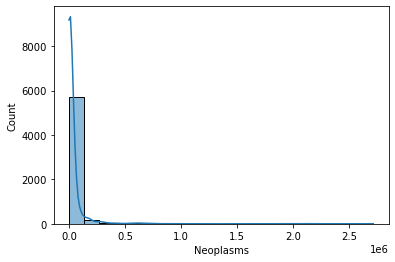

In [11]:
# Check for extreme values

sns.histplot(df['Neoplasms'], bins=20, kde = True)

In [16]:
# Check the mean

df['Neoplasms'].mean()

38102.43449419569

In [17]:
# Check the median

df['Neoplasms'].median()

5775.5

In [18]:
# Check the max

df['Neoplasms'].max()

2716551

In [20]:
df[df['Neoplasms'] >2000000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
1110,China,CHN,2007,8407,187358,52766,10611,21,76277,23339,5014,14992,10723,66462,3413237,190310,99540,21274,159417,1180,11643,4625,2126460,88,123442,142069,27780,7878,324159,1161612,170433,297567,11500,5017,East Asia & Pacific,Upper middle income,both,3
1111,China,CHN,2008,8384,197380,54828,10623,15,73624,21775,4534,16310,10288,61286,3523450,187559,93539,21408,154710,88421,10058,4676,2168067,114,125045,146413,28939,7906,327299,1149016,167955,292928,11363,4757,East Asia & Pacific,Upper middle income,both,3
1112,China,CHN,2009,8394,208139,57485,10874,9,72888,20659,4207,16364,9981,56959,3669964,186990,87453,21192,150572,611,8901,4447,2214787,392,128147,152838,30105,8098,329237,1145608,164921,288756,11346,4509,East Asia & Pacific,Upper middle income,both,3
1113,China,CHN,2010,8341,218436,60241,11293,12,70955,18926,3762,16722,9838,53312,3831636,186499,79733,21077,146044,7175,7891,4454,2265802,19,132114,160396,30838,8425,327545,1139700,162119,285663,11362,4334,East Asia & Pacific,Upper middle income,both,3
1114,China,CHN,2011,8193,225852,61781,11739,11,66696,17477,3350,17075,9567,50513,3937801,184317,75901,20738,139061,844,7198,4400,2296328,67,134980,165833,30883,8809,315824,1115828,158710,281834,11152,4212,East Asia & Pacific,Upper middle income,both,3
1115,China,CHN,2012,8057,232656,62640,12120,0,65110,16177,3015,16455,9170,48260,3973790,181048,74505,20458,131641,871,6779,4441,2318471,55,137073,169494,30494,9145,300970,1083590,155219,277791,10934,4158,East Asia & Pacific,Upper middle income,both,3
1116,China,CHN,2013,7971,239240,63853,12748,0,63152,15134,2761,17728,8989,46072,4049045,178100,68958,20181,126196,1402,6452,4616,2337453,213,140303,173650,30263,9690,288937,1058374,151718,273718,10851,4160,East Asia & Pacific,Upper middle income,both,3
1117,China,CHN,2014,7740,249056,65555,13528,0,62733,14194,2340,21784,8980,43438,4120839,175785,63241,20069,123006,1684,6131,4582,2378155,425,145136,177089,29957,10365,279949,1042132,149653,271449,10766,4143,East Asia & Pacific,Upper middle income,both,3
1118,China,CHN,2015,7553,259217,66761,14487,0,61489,13512,2341,26060,8872,41987,4180060,175523,66013,19893,120453,551,6078,4720,2414868,211,149030,179638,29323,11176,268987,1029418,148056,270036,10738,4171,East Asia & Pacific,Upper middle income,both,3
1119,China,CHN,2016,7550,275481,69364,15827,0,61049,13076,2510,29402,8964,42073,4292981,179477,66904,19803,121045,1340,6243,5072,2477718,20,155700,184528,29051,12262,262951,1039047,148104,271648,10789,4234,East Asia & Pacific,Upper middle income,both,3


#### There are no extreme values. All of the large values for 'Cardiovascular Diseases' and 'Neoplasms' belong to China which makes sense because it has a large population. Its values are also similar to each other with no apparent outliers.

## 3. Data prep for regression analysis 

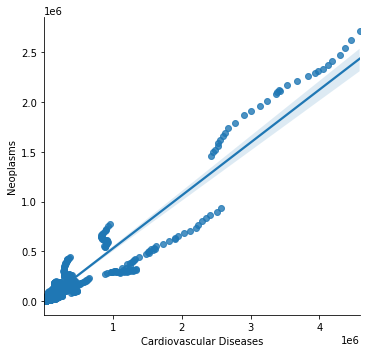

In [23]:
# Create a scatterplot for 'Cardiovascular Diseases' and 'Neoplasms' using seaborn

scatter = sns.lmplot(x = 'Cardiovascular Diseases', y = 'Neoplasms', data = df)

### Hypothesis: The higher the DALY's for cardiovascular disease, the higher the DALY's for neoplasms.

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Cardiovascular Diseases'].values.reshape(-1,1)
y = df['Neoplasms'].values.reshape(-1,1)

In [25]:
X

array([[44899],
       [45492],
       [46557],
       ...,
       [17187],
       [17460],
       [17810]], dtype=int64)

In [26]:
y

array([[11580],
       [11796],
       [12218],
       ...,
       [11744],
       [12038],
       [12353]], dtype=int64)

In [27]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [28]:
# Create a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [29]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

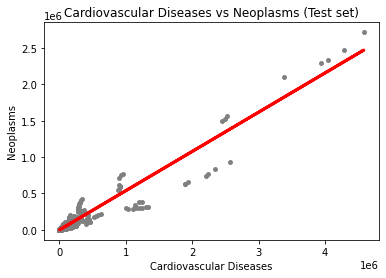

In [31]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cardiovascular Diseases vs Neoplasms (Test set)')
plot_test.xlabel('Cardiovascular Diseases')
plot_test.ylabel('Neoplasms')
plot_test.show()

#### The regression line seems to fit most of the data, but there is a group of data points that are further from the line. Also, the majority of points are concentrated in the bottom left corner of the plot. This suggests a single regression line may not be the most accurate prediction model.

In [32]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score 

In [33]:
# Print the model summary statistics to evaluate the performance of the model

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.53955063]]
Mean squared error:  2203159493.6244636
R2 score:  0.9140297218785522


#### The R2 score is 0.914 which is fairly close to 1. This indicates that the model is a good fit for the data. However, the mean squared error is extremely large which indicates the model is not a good fit for the data.

In [34]:
y_predicted

array([[113146.87041452],
       [ 17214.76892287],
       [  7636.66619127],
       ...,
       [ -1004.23710113],
       [   129.89831695],
       [ 21159.42355732]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,181479,113146.870415
1,24780,17214.768923
2,7653,7636.666191
3,726,-486.268499
4,128,-1689.466398
5,5557,12626.969941
6,195,-1622.022569
7,10,-1774.175846
8,1273,952.173473
9,10591,10790.879157


####  There is quite a difference between the actual and predicted y values. This adds evidence to the fact that the model is not doing a great job of explaining the relationship between Cardiovascular Diseases and Neoplasms.

## 5. Test another hypothesis: The higher the DALY's for 'Nutritional Deficiencies', the higher the DALY's for 'Protein-Energy Malnutrition'.

### Data Cleaning

<AxesSubplot:xlabel='Nutritional Deficiencies', ylabel='Count'>

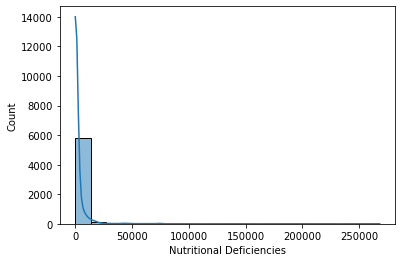

In [36]:
# Check for extreme values

sns.histplot(df['Nutritional Deficiencies'], bins=20, kde = True)

In [38]:
# Check the mean

df['Nutritional Deficiencies'].mean()

2287.2358208955225

In [39]:
# Check the median

df['Nutritional Deficiencies'].median()

123.5

In [40]:
# Check the max

df['Nutritional Deficiencies'].max()

268223

In [44]:
df[df['Nutritional Deficiencies'] >100000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
2406,India,IND,1990,98358,24195,13419,268223,162369,88688,38720,106173,1138,3466,613999,1201775,690913,852761,12818,154133,2097,1081098,10057,376687,7966,78789,92805,7257,202241,129821,601995,144247,315248,23032,61782,South Asia,Lower middle income,both,2
2407,India,IND,1991,97134,24862,14011,253431,159473,88014,37806,106715,1707,3559,637316,1243951,682280,837776,13067,159309,2641,1100375,10045,387105,4721,82661,97100,7337,188418,135557,621913,146547,321460,23373,63189,South Asia,Lower middle income,both,2
2408,India,IND,1992,94891,25353,14394,237280,151759,86073,38859,107929,3045,3614,657515,1273738,675001,832447,13166,163032,977,1119477,10528,395789,4840,85848,100695,7355,174878,138623,635103,147875,325680,23576,63765,South Asia,Lower middle income,both,2
2409,India,IND,1993,91783,26306,14824,222390,142187,85025,39355,103614,5703,3749,625704,1289988,656565,826406,13442,164001,11251,1081215,10170,406002,1896,88235,102753,7008,163748,141224,642943,152524,332205,23482,64305,South Asia,Lower middle income,both,2
2410,India,IND,1994,88221,27469,15174,208659,131169,83638,39070,100460,10143,3920,601109,1307746,639401,818668,13830,165973,2234,1036372,10236,417586,1773,90876,105096,6884,153824,144071,648031,157804,338463,23307,64115,South Asia,Lower middle income,both,2
2411,India,IND,1995,86142,28678,15489,195629,123847,81222,39445,96995,16865,4004,587389,1316260,628936,813767,13922,166439,2376,1015476,10599,423498,1359,92749,106774,6713,144465,145480,650000,160463,340719,23612,64007,South Asia,Lower middle income,both,2
2412,India,IND,1996,83642,30275,16385,181431,120014,77890,39721,95779,26565,4214,584539,1374290,617082,802117,14357,170096,2876,994967,10137,442878,1712,99306,112643,6609,133450,147942,672752,167233,350722,23324,62920,South Asia,Lower middle income,both,2
2413,India,IND,1997,82891,32050,17949,169334,118550,79082,40703,98641,39446,4606,603896,1483173,616778,797154,15207,181356,2476,997437,10497,473691,2018,110562,123291,6561,123414,157629,721528,178190,370746,24484,63908,South Asia,Lower middle income,both,2
2414,India,IND,1998,80366,33498,18778,154443,108147,79681,41945,98526,56161,4826,605183,1518213,608792,794254,15503,188455,5976,994597,13308,486666,1790,117335,128993,6532,112329,163005,740139,183316,377646,24595,64045,South Asia,Lower middle income,both,2
2415,India,IND,1999,78524,34704,18778,138994,84608,77952,42901,98792,75568,5013,602670,1502751,592896,784542,15874,195957,11032,984335,10834,489035,2592,119235,131258,6488,101299,167469,731638,186860,380189,25009,63667,South Asia,Lower middle income,both,2


<AxesSubplot:xlabel='Protein-Energy Malnutrition', ylabel='Count'>

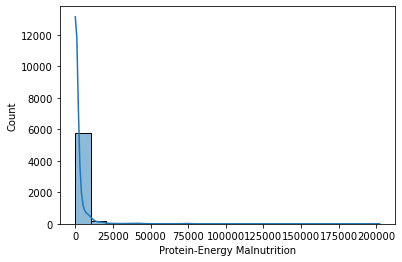

In [37]:
# Check for extreme values

sns.histplot(df['Protein-Energy Malnutrition'], bins=20, kde = True)

In [45]:
# Check the mean

df['Protein-Energy Malnutrition'].mean()

1995.337479270315

In [46]:
# Check the median

df['Protein-Energy Malnutrition'].median()

97.0

In [47]:
# Check the max

df['Protein-Energy Malnutrition'].max()

202241

In [48]:
df[df['Protein-Energy Malnutrition'] >100000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
2406,India,IND,1990,98358,24195,13419,268223,162369,88688,38720,106173,1138,3466,613999,1201775,690913,852761,12818,154133,2097,1081098,10057,376687,7966,78789,92805,7257,202241,129821,601995,144247,315248,23032,61782,South Asia,Lower middle income,both,2
2407,India,IND,1991,97134,24862,14011,253431,159473,88014,37806,106715,1707,3559,637316,1243951,682280,837776,13067,159309,2641,1100375,10045,387105,4721,82661,97100,7337,188418,135557,621913,146547,321460,23373,63189,South Asia,Lower middle income,both,2
2408,India,IND,1992,94891,25353,14394,237280,151759,86073,38859,107929,3045,3614,657515,1273738,675001,832447,13166,163032,977,1119477,10528,395789,4840,85848,100695,7355,174878,138623,635103,147875,325680,23576,63765,South Asia,Lower middle income,both,2
2409,India,IND,1993,91783,26306,14824,222390,142187,85025,39355,103614,5703,3749,625704,1289988,656565,826406,13442,164001,11251,1081215,10170,406002,1896,88235,102753,7008,163748,141224,642943,152524,332205,23482,64305,South Asia,Lower middle income,both,2
2410,India,IND,1994,88221,27469,15174,208659,131169,83638,39070,100460,10143,3920,601109,1307746,639401,818668,13830,165973,2234,1036372,10236,417586,1773,90876,105096,6884,153824,144071,648031,157804,338463,23307,64115,South Asia,Lower middle income,both,2
2411,India,IND,1995,86142,28678,15489,195629,123847,81222,39445,96995,16865,4004,587389,1316260,628936,813767,13922,166439,2376,1015476,10599,423498,1359,92749,106774,6713,144465,145480,650000,160463,340719,23612,64007,South Asia,Lower middle income,both,2
2412,India,IND,1996,83642,30275,16385,181431,120014,77890,39721,95779,26565,4214,584539,1374290,617082,802117,14357,170096,2876,994967,10137,442878,1712,99306,112643,6609,133450,147942,672752,167233,350722,23324,62920,South Asia,Lower middle income,both,2
2413,India,IND,1997,82891,32050,17949,169334,118550,79082,40703,98641,39446,4606,603896,1483173,616778,797154,15207,181356,2476,997437,10497,473691,2018,110562,123291,6561,123414,157629,721528,178190,370746,24484,63908,South Asia,Lower middle income,both,2
2414,India,IND,1998,80366,33498,18778,154443,108147,79681,41945,98526,56161,4826,605183,1518213,608792,794254,15503,188455,5976,994597,13308,486666,1790,117335,128993,6532,112329,163005,740139,183316,377646,24595,64045,South Asia,Lower middle income,both,2
2415,India,IND,1999,78524,34704,18778,138994,84608,77952,42901,98792,75568,5013,602670,1502751,592896,784542,15874,195957,11032,984335,10834,489035,2592,119235,131258,6488,101299,167469,731638,186860,380189,25009,63667,South Asia,Lower middle income,both,2


#### There are no extreme values. All of the large values for 'Nutritional Deficiencies' and 'Protein-Energy Malnutrition' belong to India which makes sense because it has a large population and it belongs in the lower middle income group. Its values are also similar to each other with no apparent outliers.

### Data prep for regression analysis

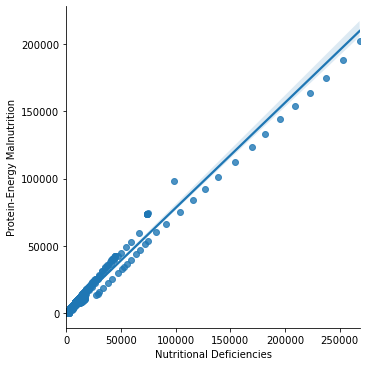

In [49]:
# Create a scatterplot for 'Nutritional Deficiencies' and 'Protein-Energy Malnutrition' using seaborn

scatter_2 = sns.lmplot(x = 'Nutritional Deficiencies', y = 'Protein-Energy Malnutrition', data = df)

### Hypothesis: The higher the DALY's for nutritional deficiencies, the higher the DALY's for protein-energy malnutrition.

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects

X_2 = df['Nutritional Deficiencies'].values.reshape(-1,1)
y_2 = df['Protein-Energy Malnutrition'].values.reshape(-1,1)

In [59]:
X_2

array([[2087],
       [2153],
       [2441],
       ...,
       [2990],
       [2918],
       [2884]], dtype=int64)

In [60]:
y_2

array([[2054],
       [2119],
       [2404],
       ...,
       [2962],
       [2890],
       [2855]], dtype=int64)

In [61]:
# Split data into a training set and a test set

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

### Regression analysis

In [54]:
# Create a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train_2, y_train_2)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted_2 = regression.predict(X_test_2)

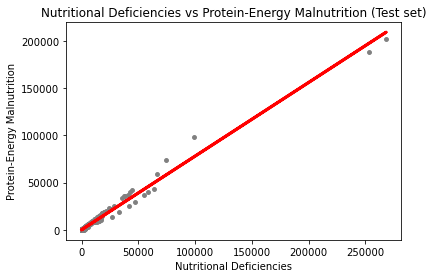

In [64]:
# Create a plot that shows the regression line from the model on the test set

plot_test_2 = plt
plot_test_2.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test_2.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test_2.title('Nutritional Deficiencies vs Protein-Energy Malnutrition (Test set)')
plot_test_2.xlabel('Nutritional Deficiencies')
plot_test_2.ylabel('Protein-Energy Malnutrition')
plot_test_2.show()

#### The regression line seems to fit most of the data, including the densest region. This suggests the regression line is an accurate prediction model.

In [65]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_2, y_predicted_2) # This is the mean squared error
r2 = r2_score(y_test_2, y_predicted_2) # This is the R2 score

In [66]:
# Print the model summary statistics to evaluate the performance of the model

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77893219]]
Mean squared error:  1115470.7890226538
R2 score:  0.983621873224579


#### The R2 score is 0.9836 which is very close to 1. This indicates that the model is a good fit for the data. However, the mean squared error is quite large which indicates the model may not be a good fit for the data.

In [67]:
y_predicted_2

array([[ 723.58763265],
       [ 312.31143706],
       [1703.48432592],
       ...,
       [ 221.17637099],
       [ 225.07103193],
       [ 349.70018211]])

In [70]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,462,723.587633
1,101,312.311437
2,1794,1703.484326
3,18,232.081422
4,3,220.397439
5,3,221.955303
6,10,226.628896
7,1,218.839574
8,2,249.996862
9,2,224.292100


####  There is quite a difference between the actual and predicted y values. This suggests that the model is not doing a great job of explaining the relationship between Nutritional Deficiencies and Protein-Energy Malnutrition.